## Implemeting **Tensorflow**

In [96]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [97]:
df = pd.read_csv('aps_data.csv')

C:\Users\KUSHAL\AppData\Local\Temp\ipykernel_20468\613019470.py:1: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aps_data.csv')


In [98]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,neg,31394,na,0,na,0,0,0,0,0,...,393008,207182,367634,267778,106778,48688,57146,638,0,0
4996,neg,1598,na,0,na,0,0,0,0,0,...,5298,3164,9710,47042,2296,1098,3288,272,0,0
4997,neg,42,2,2130706454,56,0,0,0,0,0,...,660,272,334,76,14,0,0,0,0,0
4998,neg,32752,na,0,na,0,0,0,0,0,...,533772,37122,56252,23188,1138,134,22,0,0,0


- Replacing 'na' value by numpy.nan

In [99]:
df = df.replace('na',np.NaN)    

In [100]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [101]:
rows_df = df.shape[0]

print("Percentage of null data in columns")
for column in df.columns:
    print(f"{column} : {(df[column].isnull().sum()/rows_df)}")

Percentage of null data in columns
class : 0.0
aa_000 : 0.0
ab_000 : 0.7698
ac_000 : 0.0616
ad_000 : 0.2472
ae_000 : 0.0448
af_000 : 0.0448
ag_000 : 0.0116
ag_001 : 0.0116
ag_002 : 0.0116
ag_003 : 0.0116
ag_004 : 0.0116
ag_005 : 0.0116
ag_006 : 0.0116
ag_007 : 0.0116
ag_008 : 0.0116
ag_009 : 0.0116
ah_000 : 0.012
ai_000 : 0.0112
aj_000 : 0.0112
ak_000 : 0.0768
al_000 : 0.013
am_0 : 0.0112
an_000 : 0.013
ao_000 : 0.0106
ap_000 : 0.013
aq_000 : 0.0106
ar_000 : 0.0484
as_000 : 0.0112
at_000 : 0.0112
au_000 : 0.0112
av_000 : 0.0448
ax_000 : 0.0448
ay_000 : 0.0116
ay_001 : 0.0116
ay_002 : 0.0116
ay_003 : 0.0116
ay_004 : 0.0116
ay_005 : 0.0116
ay_006 : 0.0116
ay_007 : 0.0116
ay_008 : 0.0116
ay_009 : 0.0116
az_000 : 0.0116
az_001 : 0.0116
az_002 : 0.0116
az_003 : 0.0116
az_004 : 0.0116
az_005 : 0.0116
az_006 : 0.0116
az_007 : 0.0116
az_008 : 0.0116
az_009 : 0.0116
ba_000 : 0.0122
ba_001 : 0.0122
ba_002 : 0.0122
ba_003 : 0.0122
ba_004 : 0.0122
ba_005 : 0.0122
ba_006 : 0.0122
ba_007 : 0.0122
ba

 - Creating list of columns having less than $20%$ of **Null** values.

In [102]:
list_column_required = [column for column in df.columns if df[column].isnull().sum()/len(df[column])<0.2]

In [103]:
print(f"Total number of columns in original dataframe: {len(df.columns)}")
print(f"Required number of columns from original dataframe: {len(list_column_required)}")

Total number of columns in original dataframe: 171
Required number of columns from original dataframe: 147


 - List of input features.

In [104]:
input_features = [column for column in list_column_required if column != 'class']

In [105]:
print(f"Verifying total number of features in dataframe after feature reduction: {len(df.columns)}")

Verifying total number of features in dataframe after feature reduction: 171


 - Imputing the dataset using KNNImputer:

In [106]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
#Applying fit_transform()
input_features_data = knn_imputer.fit_transform(df[input_features])
#Converting the imputed version of DataFrame back to DataFrame as the return type of KNNInputer() is numpy.array
df[input_features] = pd.DataFrame(input_features_data, columns=input_features)

Separating dependent and independent features.

In [107]:
X = df[input_features]
y = df["class"]

In [108]:
y.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

 - Here, the target dataframe 'y' is a binary category so we'll encode it in numerical.

In [109]:
y = y.replace('neg', 0)
y = y.replace('pos', 1)

In [110]:
len(X.columns)

146

### Implementing train test split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

### Scaling the dataset

In [113]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Import dependencies

In [114]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

1. `tensorflow.keras.models.Sequential` is a class in the TensorFlow library (specifically, the Keras API within TensorFlow) used for creating linear stack models, where each layer has exactly one input tensor and one output tensor. It is a simple way to build neural networks by adding one layer at a time.

2. `tensorflow.keras.models.load_model` is a function in TensorFlow's Keras API that allows you to load a saved Keras model from a file. This function is used when you want to reuse a previously trained model or share your model with others without needing to retrain it.

3. `tensorflow.keras.layers.Dense` is a class in TensorFlow, a popular deep learning library, specifically in the Keras API. It represents a fully connected (dense) neural network layer.


In [115]:
classifier=Sequential()

classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 146))

classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation = 'relu'))
 
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

### Understanding the construction of the neural network:

```python
classifier=Sequential()
```
Here, we are creating an object `classifier` having an instannce of `tensorflow.keras.models.Sequential` which will allow us to create interconnected layers in the neural network. 

```python
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim =146))
```

As the classifier object is the instance of Sequential Neural Network, to create layers for the neural network. Here, we are creating the first layer i.e. input layer of $146$ dimension and each neuron will be having $10$ outputs. Here, `'he_normal'` been used as weight initialization technique as the activation is `'relu'`.

```python
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation = 'relu'))
```

Here, we are creating the second layer where each neuron will be having $10$ outputs, `'he_normal'` as weight initialization technique and `'relu'` as activation function.

```python
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
```

Here, we are creating the third layer where it will produce the output. Since its a classification thus third layer will be having one output. Since, the third layer will do the final classification, thus we are using `'sigmoid'` as activation function and `'glorot_normal'` as kernel_initializer.

In [116]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

Here, we are compiling the created neural network, for updation of parameters(weights and bias) we'll be using `'binary_crossentropy'` as loss function and `'adam'` as optimizer.

In [117]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                1470      
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1591 (6.21 KB)
Trainable params: 1591 (6.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
type(classifier)

keras.src.engine.sequential.Sequential

## Initializing the training of model using Neural Network:

In [119]:
ann_model=classifier.fit(X_train,y_train,batch_size=100,epochs=50,validation_split=0.30)

Epoch 1/50


28/28 [==============================] - 2s 13ms/step - loss: 0.5144 - accuracy: 0.8839 - val_loss: 0.3488 - val_accuracy: 0.9350
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.9582 - val_loss: 0.2133 - val_accuracy: 0.9767
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.1772 - accuracy: 0.9807 - val_loss: 0.1575 - val_accuracy: 0.9800
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 0.1322 - accuracy: 0.9846 - val_loss: 0.1275 - val_accuracy: 0.9817
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 0.1052 - accuracy: 0.9861 - val_loss: 0.1079 - val_accuracy: 0.9825
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0872 - accuracy: 0.9879 - val_loss: 0.0958 - val_accuracy: 0.9833
Epoch 7/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0736 - accuracy: 0.9886 - val_loss: 0.0828 - val_accuracy: 0.9842
Epoch 8/50
28/28 [============

 - To check the metrics of our neural network model, we will be using the `'history'` argument to retrieve the following keys:

    - `'loss'`: The value of the loss function computed on the training data at each epoch during training. The loss function measures how well the model is performing on the training data, and the goal of training is to minimize this value.

    - `'accuracy'`: The value of the accuracy metric computed on the training data at each epoch during training. This represents the proportion of correctly predicted samples in the training data.

    - `'val_loss'`: The value of the loss function computed on the validation data at each epoch during training. The validation loss provides an indication of how well the model is generalizing to new, unseen data. It is used to detect overfitting, where the model performs well on the training data but poorly on new data.

    - `'val_accuracy'`: The value of the accuracy metric computed on the validation data at each epoch during training. Similar to 'val_loss', this metric helps to assess the model's generalization performance on unseen data.


These keys provide valuable information about the model's performance during training and validation. By analyzing these metrics across epochs, you can gain insights into how well the model is learning and whether it is overfitting or underfitting. For example:
    
   1. If the training loss is decreasing, and both training and validation accuracy are increasing, it indicates that the model is learning effectively and generalizing well to new data.

   2. If the training loss is decreasing, but the validation loss starts increasing or remains constant, while validation accuracy decreases, it suggests that the model might be overfitting to the training data.

   3. If both the training and validation loss are high and accuracy is low, it could indicate that the model is underfitting and not learning the underlying patterns in the data.

In [120]:
ann_model.history['accuracy']

[0.8839285969734192,
 0.958214282989502,
 0.9807142615318298,
 0.9846428632736206,
 0.9860714077949524,
 0.9878571629524231,
 0.9885714054107666,
 0.9889285564422607,
 0.989642858505249,
 0.9900000095367432,
 0.9900000095367432,
 0.991428554058075,
 0.9910714030265808,
 0.9917857050895691,
 0.991428554058075,
 0.991428554058075,
 0.9928571581840515,
 0.9932143092155457,
 0.993571400642395,
 0.9942857027053833,
 0.9942857027053833,
 0.9946428537368774,
 0.996071457862854,
 0.9957143068313599,
 0.9967857003211975,
 0.9967857003211975,
 0.9978571534156799,
 0.9978571534156799,
 0.9978571534156799,
 0.9978571534156799,
 0.9978571534156799,
 0.9985714554786682,
 0.9985714554786682,
 0.9985714554786682,
 0.9985714554786682,
 0.9985714554786682,
 0.9985714554786682,
 0.9985714554786682,
 0.9989285469055176,
 0.9989285469055176,
 0.9989285469055176,
 0.9989285469055176,
 0.9989285469055176,
 0.9989285469055176,
 0.9989285469055176,
 0.9989285469055176,
 0.9989285469055176,
 0.9989285469055176,

 - **Plotting the accuracy of the model corresponding to each epochs.**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


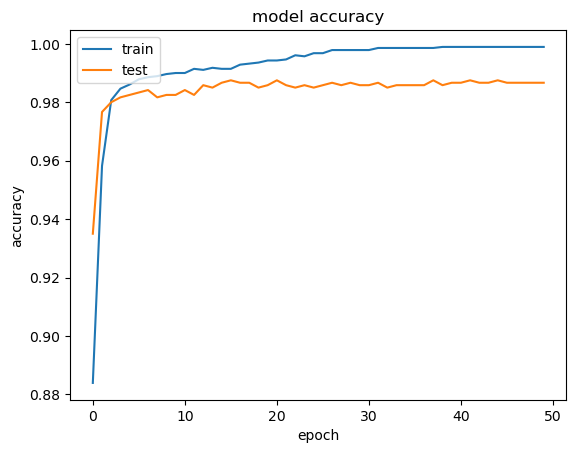

In [121]:
import matplotlib.pyplot as plt

print(ann_model.history.keys())
# summarize history for accuracy
plt.plot(ann_model.history['accuracy'])
plt.plot(ann_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

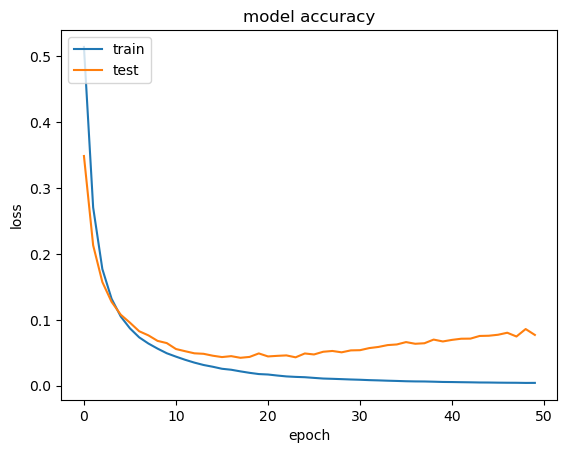

In [122]:
# summarize history for accuracy
plt.plot(ann_model.history['loss'])
plt.plot(ann_model.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The training loss and both training and validation accuracy are constant in an artificial neural network, it suggests that the model has likely reached a plateau and is no longer learning from the data. This situation can occur for various reasons, and it's essential to investigate further to understand the potential issues. 

Here are some possible reasons for a constant training loss and accuracy:

 - **Convergence to a Local Minimum**: 
 
    The model might have converged to a local minimum in the loss landscape, where the optimization algorithm cannot make further progress. In such cases, the model might be stuck in a suboptimal solution, preventing it from achieving better performance.

 - **Incorrect Model Complexity**: 
 
    The model might be too simple to capture the underlying patterns in the data adequately. If the model is not complex enough, it may struggle to generalize well to the data, leading to constant performance metrics.

 - **Learning Rate Too Small**: 
 
    A very small learning rate could cause the optimization process to progress very slowly, leading to slow or no improvement in the model's performance.

 - **Vanishing or Exploding Gradients**: 
 
    Issues like vanishing or exploding gradients can hamper the training process, preventing the model from learning effectively.

 - **Data Issues**: 
 
    Low-quality or insufficient training data could hinder the learning process and result in constant performance metrics.

To address this issue, you can try the following steps:

 - **Adjust Model Complexity**: 
 
    If the model is too simple, consider increasing its complexity by adding more layers, neurons, or using a more advanced architecture.

 - **Learning Rate Tuning**: 
 
    Experiment with different learning rates to find an optimal value that allows the model to make meaningful updates during training.

 - **Batch Normalization**: 
 
    Consider adding batch normalization layers, which can help stabilize training by normalizing the inputs to each layer.

 - **Weight Initialization**: 
 
    Ensure that the initial weights of the neural network are appropriate, as improper initialization can impact training.

 - **Data Augmentation**: 
 
    If you have limited data, data augmentation techniques can help artificially expand the dataset and potentially improve the model's generalization.

 - **Different Optimizers**: 
 
    Try different optimization algorithms like Adam, RMSprop, or SGD with momentum, as they might behave differently on your specific problem.

 - **Early Stopping**: 
 
    Implement early stopping to stop training if the model's performance on the validation set does not improve for a certain number of epochs.

In [123]:
y_pred = classifier.predict(X_test)

32/32 [==============================] - 0s 2ms/step


Here we are going to compare the y_predict with a threshold value i.e. $0.5$.

For more information regarding the selection of this threshold value, please refer to the following blog: https://www.evidentlyai.com/classification-metrics/classification-threshold

In [124]:
y_pred = [1 if result > 0.5 else 0 for result in y_pred]

In [125]:
y_pred

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
model_metrics = confusion_matrix(y_test, y_pred)

In [128]:
model_metrics

array([[977,   8],
       [ 10,   5]], dtype=int64)

 - Hyperparameter Tuning using Keras Tuner

    For this we will require another library i.e. keras-tuner. So, we'll be installing this library.
    
    ```bash
    !pip install keras-tuner --upgrade
    ```

In [129]:
from kerastuner.tuners import RandomSearch

 - Constructing a function for hyperparameter tunning for the neural network:

 For more details you can refer this link: https://keras.io/keras_tuner/

In [130]:
def build_model(hp):
  model = Sequential()
  #1st layer of neural network
  model.add(Dense(hp.Choice("units", [8,16,32,64]),
                  kernel_initializer = 'he_uniform',
                  activation='relu',
                  input_dim = 146,))
  #2nd layer of neural network
  model.add(Dense(hp.Choice("units", [8,16,32,64]),
                  kernel_initializer = 'he_uniform',
                  activation='relu',))
  #3rd layer of neural network(i.e. output layer)
  model.add(Dense(1,
                  activation='sigmoid'))

  
    #Optimizers to be used in different different layers of neural network
  optimizer = hp.Choice("optimizer", values =['adam', 'sgd', 'rmsprop', 'adadelta'])
  #Loss function to be used in different different layers of neural network
  loss = hp.Choice("loss", values =['binary_crossentropy', 'hinge', 'sigmoid_focal_crossentropy', 'squared_hinge', 'kullback_leibler_divergence', 'mean_squared_error'])
  #Constructing the neural network model
  model.compile(optimizer = optimizer, loss = loss, metrics = 'accuracy')

  return model

In [131]:
tuner = RandomSearch(build_model, 
             objective='val_accuracy',
             max_trials=5,
             directory = "Neural_network_results",
             project_name = "Results")

In [132]:
tuner.search(X_train, y_train, 
             validation_data = (X_test, y_test), 
             epochs = 5,)

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.6169999837875366

Best val_accuracy So Far: 0.9850000143051147
Total elapsed time: 00h 00m 18s
INFO:tensorflow:Oracle triggered exit


In [133]:
tuner.get_best_hyperparameters()[0].values

{'units': 64, 'optimizer': 'adam', 'loss': 'squared_hinge'}

In [134]:
best_model = tuner.get_best_models(num_models = 1)[0]

In [135]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                9408      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13633 (53.25 KB)
Trainable params: 13633 (53.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 - Hyperparameter tunning with number of neurons in layers:

In [136]:
def build_model(hp):
  model = Sequential()

  #1st layer of neural network
  for i in range(hp.Int('num_layers', 2, 20)):
    model.add(Dense(units = hp.Int("units_" + str(i),
                                   min_value = 8,
                                   max_value = 512,
                                   step = 8),
                    kernel_initializer = 'he_uniform',
                    activation='relu',
                    input_dim = 146,))
    
  #2nd layer of neural network
  model.add(Dense(units = 8,
                  kernel_initializer = 'he_uniform',
                  activation='relu',))
  #3rd layer of neural network(i.e. output layer)
  model.add(Dense(1,
                  activation='sigmoid'))

  
    #Optimizers to be used in different different layers of neural network
  optimizer = hp.Choice("optimizer", values =['adam', 'sgd', 'rmsprop', 'adadelta'])
  #Loss function to be used in different different layers of neural network
  loss = hp.Choice("loss", values =['binary_crossentropy', 'hinge', 'sigmoid_focal_crossentropy', 'squared_hinge', 'kullback_leibler_divergence', 'mean_squared_error'])
  #Constructing the neural network model
  model.compile(optimizer = optimizer, loss = loss, metrics = 'accuracy')

  return model

In [137]:
tuner_second = RandomSearch(build_model,
                            objective = 'val_accuracy',
                            max_trials = 5,
                            directory = "Neural_network_results_new",
                            project_name = "Hyperparameter_tunning",)

INFO:tensorflow:Reloading Tuner from Neural_network_results_new\Hyperparameter_tunning\tuner0.json


In [138]:
tuner_second.search(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs = 15,)

INFO:tensorflow:Oracle triggered exit


In [139]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units_0': 144,
 'units_1': 432,
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'units_2': 200,
 'units_3': 504}

In [140]:
new_best_model = tuner_second.get_best_models(num_models = 1)[0]

In [141]:
new_best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 144)               21168     
                                                                 
 dense_1 (Dense)             (None, 432)               62640     
                                                                 
 dense_2 (Dense)             (None, 8)                 3464      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 87281 (340.94 KB)
Trainable params: 87281 (340.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Let's create a pipeline for our neural network**:

### 1. **Function for Data Ingestion**

Required dependencies:

In [142]:
import pandas as pd
import numpy as np

In [143]:
def data_ingestion(file_path: str)-> pd.DataFrame:
    """
    Loading the CSV file
    Args: 
        - file_path: File path to the CSV file
    Returns: The give function will return the CSV file into a converted DataFrame.
    """
    df = pd.read_csv(file_path)
    return df

df = data_ingestion('aps_data.csv')

C:\Users\KUSHAL\AppData\Local\Temp\ipykernel_20468\3404038531.py:8: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### 2. **Function for Data Transformation**

In [144]:
from typing import List
from sklearn.impute import KNNImputer

In [145]:
#Constants

NULL_THRESHOLD = 0.2
TARGET_FEATURE = "class"

In [146]:
def data_transformation(df: pd.DataFrame, null_threshold: float, target_column: str):
    """
    Tranforming the data frame.
    Here, we'll be taking the DataFrame removing the columns with having more than 20%
    of null values and applying knn imputation on the columns present in the DataFrame.
    Args: 
        - file_path: File path to the CSV fxile
    Returns: The given function will transform the DataFrame and the list of required columns.
    """

    def transforming_null_data(df: pd.DataFrame)->pd.DataFrame:
        """
        This replace the 'na' values by np.nan
        Args: 
            - df: DataFrame to be transformed
        Returns: The given function will return the converted DataFrame.
        """
        df = df.replace('na', np.nan)

        return df

    def list_required_columns(df: pd.DataFrame)->List:
        """
        This will create a list of required columns for the model.
        Args: 
            - df: DataFrame to be transformed
            - null_threshold: Accepted percentage of null data in a column
        Returns: The given function will return the list of desired column in the DataFrame.
        """
        return [column for column in df.columns if df[column].isnull().sum()/len(df[column]) < null_threshold]
    
    def filtered_dataframe(df: pd.DataFrame, filtered_columns: List) -> pd.DataFrame:
        """
        This function will create the dataframe using the required list of columns.
        Args: 
            - df: DataFrame to be transformed
            - filtered_columns: List of required columns for the dataframe.
        Returns: The given function will return the transformed dataframe.
        """
        df = df[filtered_columns]
        return df
    
    def list_input_features(list_features:List) -> List:
        """
        This function will create list of input features.
        Args: 
            - list_features: List of required columns for the dataframe
            - target_feature: Column name of target feature
        Returns: The given function will return the list of input features.
        """
        return [column for column in list_features if column not in [target_column]]
    
    def encoding_features(df : pd.DataFrame, input_features: List) -> pd.DataFrame:
        """
        This function will encode the target feature in the DataFrame.
        Args: 
            - df: DataFrame to be transformed
            - target_column: Name of the target column
        Returns: The given function will return the dataframe with encoded target column.
        """
        df[target_column]=pd.get_dummies(df[target_column],drop_first=True)
        df[input_features] = df[input_features].astype(float)
        return df
    
    def imputing_missing_data(df: pd.DataFrame, list_columns: List) -> pd.DataFrame:
        """
        This function will impute the np.nan values in the DataFrame.
        Args: 
            - df: DataFrame to be transformed
        Returns: The given function will return the imputed version of dataframe.
        """
        #Creating instance of KNNImputer
        knn_imputer = KNNImputer(n_neighbors=3)
        #Applying fit_transform()
        imputed_data = knn_imputer.fit_transform(df)
        #Converting the imputed version of DataFrame back to DataFrame as the return type of KNNInputer() is numpy.array
        imputed_df = pd.DataFrame(imputed_data, columns=list_columns)

        return imputed_df
    
    
    
    dataframe = transforming_null_data(df)
    columns_required = list_required_columns(df = dataframe)
    input_features = list_input_features(list_features = columns_required)
    dataframe = filtered_dataframe(df = dataframe, filtered_columns = columns_required)
    dataframe = encoding_features(df = dataframe, input_features = input_features)
    dataframe = imputing_missing_data(df = dataframe, list_columns = columns_required)
    dataframe[target_column] = dataframe[target_column].astype(int) 
    
    return dataframe

In [147]:
data = data_transformation(df = df, null_threshold = NULL_THRESHOLD, target_column = TARGET_FEATURE)

In [148]:
data.head()

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,614.0,...,26.0,8.0,26.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,1268.0,526.0,554.0,300.0,118.0,260.0,0.0,0.0,0.0,0.0
2,0,30.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,480.0,84.0,74.0,50.0,46.0,0.0,0.0,0.0,0.0,0.0
3,0,444.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,17950.0,...,1614.0,1144.0,3598.0,2460.0,1258.0,8524.0,110.0,0.0,0.0,0.0
4,0,82.0,12.0,0.0,0.0,0.0,0.0,1464.0,4980.0,13632.0,...,1010.0,132.0,310.0,56.0,92.0,1292.0,0.0,0.0,0.0,0.0


### 3. **Function for preparing DataFrame for Training and testing**

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [150]:
TEST_SIZE = 0.2
TARGET_FEATURE = "class"
RANDOM_STATE = 42

In [151]:
def preparing_data(df : pd.DataFrame, random_state:int, target_column:str, test_size:float) -> pd.DataFrame:
    """"
    Preparing the dataset for training.
    Here, we'll be taking the DataFrame splitting the data into Independent features 
    and dependent features and then again splitting them for training and testing.
    Args: 
        - df: DataFrame
        - training_data: percentage of training data
    Returns: The given function will return the training and testing datasets.
    """

    def splitting_data(df : pd.DataFrame) -> pd.DataFrame:
        """"
        Splitting the dataset into Independent features and dependent features.
        Args: 
            - df: DataFrame
        Returns: The given function will return two dataframes one containing Input and 
                 the other will contain target features.
        """
        X = df.drop(columns = target_column)
        y = df[target_column]

        return X, y

    def train_test_data(X : pd.DataFrame, y : pd.DataFrame) -> pd.DataFrame:
        """"
        Splitting the X and y dataset into train test split and applying standard scalar.
        Args: 
            - X: DataFrame containing input features
            - y: DataFrame containing target feature
        Returns: The given function will return four dataframes. For each of the independent
                 and taget there will be train and test dataframe.
        """

        X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = test_size, random_state = random_state)

        sscalar = StandardScaler()
        X_train = sscalar.fit_transform(X_train)
        X_test = sscalar.transform(X_test)
        return X_train, X_test, y_train, y_test

    X, y = splitting_data(df = df)
    X_train, X_test, y_train, y_test = train_test_data(X = X, y = y)

    return(X_train, X_test, y_train, y_test)

In [152]:
X_train, X_test, y_train, y_test = preparing_data(df = data, random_state = RANDOM_STATE, target_column = TARGET_FEATURE, test_size = TEST_SIZE)

### 4. **Function for Model Training using ANN in Tensforflow**

In [153]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [154]:
BATCH_SIZE = 10
EPOCHS = 100
VALIDATION_SPLIT = 0.25
INPUT_DIMENSION = 146
OUT_DIMENSION_LAYER1 = 10
OUT_DIMENSION_LAYER2 = 10

In [155]:
def model_training(input_dim: int, X_train: np.array, y_train: np.array, batch_size: int, epochs : int, validation_split : float, layer1_out_dim: int, layer2_out_dim: int):

    def build_neural_network():

        classifier = Sequential()
        classifier.add(Dense(units=layer1_out_dim,kernel_initializer='he_uniform',activation='relu',input_dim = input_dim))
        classifier.add(Dense(units = layer2_out_dim, kernel_initializer = 'he_uniform',activation='relu'))
        classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
        classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

        return classifier, classifier.summary()

    def neural_network_training(neural_network: tensorflow.keras.models.Sequential, ):

        model_training = neural_network.fit(X_train,y_train,batch_size=10,epochs=30,validation_split=0.25)

        return model_training, model_training.history['accuracy']


    neural_network_model, neural_network_info = build_neural_network()
    #Save details of neural network
    trained_model, trained_model_summary = neural_network_training(neural_network_model)
    #Save details of neural network

    return neural_network_model, neural_network_info, trained_model, trained_model_summary

In [156]:
nn_model, nn_model_summary, nn_model_trained, nn_model_trained_summary = model_training(input_dim = INPUT_DIMENSION, X_train = X_train, y_train = y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT, layer1_out_dim = OUT_DIMENSION_LAYER1, layer2_out_dim = OUT_DIMENSION_LAYER2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                1470      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1591 (6.21 KB)
Trainable params: 1591 (6.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30


300/300 [==============================] - 2s 4ms/step - loss: 0.1941 - accuracy: 0.9753 - val_loss: 0.0932 - val_accuracy: 0.9770
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9847 - val_loss: 0.0639 - val_accuracy: 0.9800
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9873 - val_loss: 0.0446 - val_accuracy: 0.9830
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0365 - accuracy: 0.9903 - val_loss: 0.0587 - val_accuracy: 0.9840
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0302 - accuracy: 0.9910 - val_loss: 0.0353 - val_accuracy: 0.9860
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0339 - val_accuracy: 0.9870
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0290 - val_accuracy: 0.9900
Epoch 8/30
300/30

### Understanding the construction of the neural network:

```python
classifier=Sequential()
```
Here, we are creating an object `classifier` having an instannce of `tensorflow.keras.models.Sequential` which will allow us to create interconnected layers in the neural network. 

```python
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim =146))
```

As the classifier object is the instance of Sequential Neural Network, to create layers for the neural network. Here, we are creating the first layer i.e. input layer of $146$ dimension and each neuron will be having $10$ outputs. Here, `'he_normal'` been used as weight initialization technique as the activation is `'relu'`.

```python
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation = 'relu'))
```

Here, we are creating the second layer where each neuron will be having $10$ outputs, `'he_normal'` as weight initialization technique and `'relu'` as activation function.

```python
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
```

Here, we are creating the third layer where it will produce the output. Since its a classification thus third layer will be having one output. Since, the third layer will do the final classification, thus we are using `'sigmoid'` as activation function and `'glorot_normal'` as kernel_initializer.

### 5. **Model Prediction:**

In [157]:
def model_prediction(model, X_test: pd.DataFrame)->pd.DataFrame:

    y_pred = model.predict(X_test)

    y_pred = [1 if data>0.5 else 0 for data in y_pred ]

    return y_pred

In [158]:
y_pred = model_prediction(model = nn_model, 
                          X_test = X_test)

32/32 [==============================] - 0s 2ms/step


### 6. **Function for Model Evaluation:**

In [159]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [160]:
def model_evaluation(y_pred, y_test, trained_model):

    def confusion_matrix_():
        # Plot the confusion matrix as a heatmap using matplotlib
        plt.imshow(confusion_matrix(y_test, y_pred), 
                   interpolation='nearest', 
                   cmap=plt.cm.Blues)

        # Add color bar
        plt.colorbar()

        # Add labels, title, and axis ticks
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.savefig('model_confusion_matrix.png')
        plt.close()

    def training_model_loss_summary():
        # summarize history for accuracy
        plt.plot(trained_model.history['loss'])
        plt.plot(trained_model.history['val_loss'])
        plt.title('Model loss summary')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.savefig('model_accuracy_summary.png')
        plt.close()

    def training_model_accuracy_summary():
        plt.plot(trained_model.history['accuracy'])
        plt.plot(trained_model.history['val_accuracy'])
        plt.title('Model accuracy summary')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.savefig('model_loss_summary.png')
        plt.close()

    confusion_matrix_()
    training_model_loss_summary()
    training_model_accuracy_summary()


In [161]:
model_evaluation(y_pred = y_pred, 
                 y_test = y_test, 
                 trained_model = nn_model_trained)